In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

from pygenstability import plotting
from pygenstability.contrib.optimal_scales import *

# Setup MSF

In [2]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration import MSF
from msfiltration.msf_bootstrapping import plot_pds, select_scales_pds, msf_bootstrap

In [3]:
# Set MS parameters
n_time = 200
min_time = -1.5
max_time = 0.5

In [4]:
# number of bootstraps
B = 20
# number of samples for each bootstrap
n_sample = 150

# 6th real network: ADK 2RH5


In [5]:
# Load graph in networkx
root = "/home/tc/OneDrive/Software/MSFiltration/experiments/adk_graph/"
G = nx.read_gpickle(root+"2RH5.gpickle")

# Get sparse adajacency matrix
A = G.adjacency()

In [6]:
# Compute spring layout
pos = nx.spring_layout(G,seed=5)

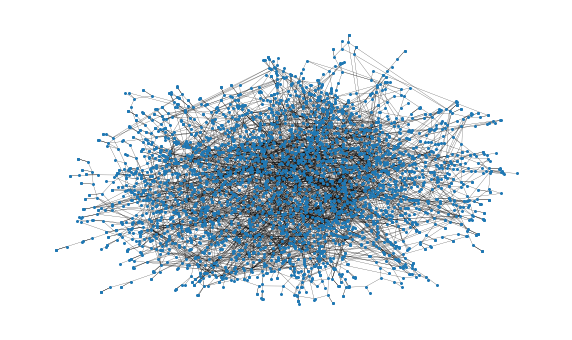

In [7]:
# Plot network
fig, ax = plt.subplots(1,figsize =(10,6))
nx.draw(G,ax=ax,pos=pos, node_size = 4,width = 0.2)

In [8]:
print(G)

Graph with 3394 nodes and 4494 edges


### Full MSF

In [6]:
# load ms results
with open(root + "ms_adk_2rh5.pkl", 'rb') as handle:
        ms_results = pickle.load(handle)

# initialise new MSF object and compute PH
msf = MSF()
msf.load_ms_results(ms_results)

full MSF dies after 22 Markov scales (11 minutes)

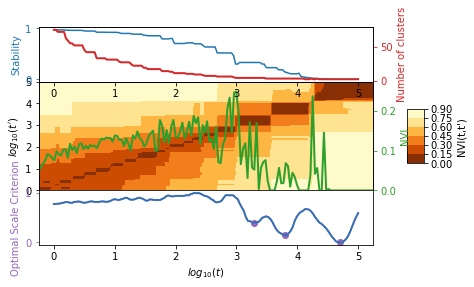

In [8]:
# select optimal scales with nvi
identify_optimal_scales(msf.ms_results,criterion_threshold=0,window_size=10)
selected_scales_nvi = msf.log_times[msf.ms_results['selected_partitions']]
# plot nvi summary of ms
plotting.plot_scan(msf.ms_results)

### Bootstrap MSF

In [9]:
persistences_bootstrapped = msf_bootstrap(msf.community_ids, msf.log_times, n_sample, B)

Building filtration ...


100%|██████████| 150/150 [00:04<00:00, 30.29it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 150/150 [00:12<00:00, 12.40it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 150/150 [00:08<00:00, 17.95it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 150/150 [00:07<00:00, 20.85it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 150/150 [00:19<00:00,  7.76it/s]


Computing persistence ... 
Building filtration ...


 47%|████▋     | 70/150 [00:00<00:00, 634.07it/s]

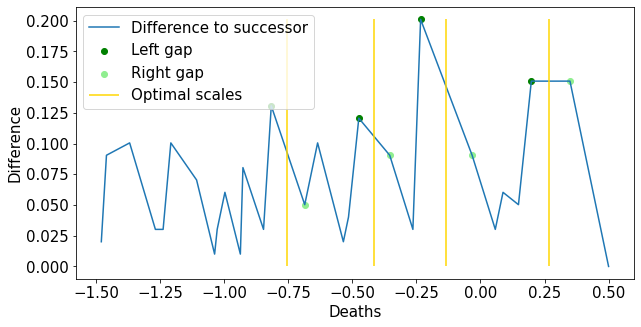

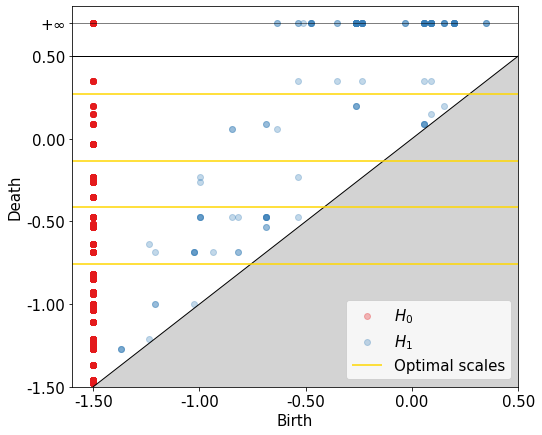

In [ ]:
# select optimal scales with ph
optimal_scales_ph, gap_width, ax = select_scales_pds(persistences_bootstrapped, msf.log_times, with_plot=True,threshold_abs=0,min_gap_width=0.105)

# plot optimal scales in PD
fig, ax = plot_pds(persistences_bootstrapped,msf.log_times,optimal_scales_ph,alpha=0.3)